In [1]:
!pip install plotly

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
pio.renderers.default = "iframe_connected"

In [2]:
df = pd.read_csv('Speed Dating Data.csv', encoding="ISO-8859-1")

In [3]:
# Overview of the dataset
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# What % of missing values?
perc_missing = 100*df.isnull().sum()/df.shape[0]
perc_missing

iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
              ...    
attr5_3     75.936978
sinc5_3     75.936978
intel5_3    75.936978
fun5_3      75.936978
amb5_3      75.936978
Length: 195, dtype: float64

In [40]:
# That's a lot of missing values, but we might need them later.

In [5]:
# Basic description of the dataset
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


In [6]:
# Renaming certain values to make them more understandable
gender = df['gender'].apply(lambda x: 
                                "Male" if x == 1 
                                else "Female" if x == 0
                                else "Other")


In [7]:
df['gender'] = df['gender'].apply(lambda x: 
                                "Male" if x == 1 
                                else "Female" if x == 0
                                else "Other")


In [8]:
# Let's look at the repartition of the participants by gender and age
fig= px.histogram(df, x= "age", title = 'Repartition of the participants by gender and age', color = gender)
figsize = (10,30)
fig.update_layout(bargap=0.2)
fig.show()

In [9]:
# We can see that we have a homogeneous distribution between male and female participants
df['gender'].value_counts()/df['gender'].count()*100
fig = px.pie(df, names=gender)
fig.show()

In [10]:
# By looking at the distribution of the observations in regards to age, we can identify some outliers. 
# I chose to eliminate the values that don't fall within the range : [\bar{X} - 3\sigma, \bar{X} + 3\sigma][Xˉ−3σ, Xˉ +3σ]
age_std = df['age'].std()
age_mean = df['age'].mean()

low_age = age_mean - 3* age_std
high_age = age_mean + 3* age_std
print(low_age, high_age)

15.658640256360604 37.059215592969345


In [11]:
df = df.drop(df[df.age < low_age].index)

In [12]:
df = df.drop(df[df.age > high_age].index)

In [13]:
fig= px.histogram(df, x= "age", title = 'Repartition of the participants by gender and age', color = df['gender'])
figsize = (10,30)
fig.update_layout(bargap=0.2)
fig.show()

In [14]:
# Renaming the values in the field column
field_data = df['field_cd'].apply(lambda x: 
                                "Law" if x == 1 
                                else "Maths" if x == 2
                                else "Social Science, Psychology" if x == 3
                                else "Medical Science" if x == 4
                                else "Engineering" if x == 5
                                else "English/Creative Writing/Journalism" if x == 6
                                else "History/Religion/Philosophy" if x == 7
                                else "Business/Ecom/Finance" if x == 8
                                else "Education,Academia" if x == 9
                                else "Biological Sciences/Chemistry/Physics" if x == 10
                                else "Social Work" if x == 11
                                else "Undergrad/undecided" if x == 12
                                else "Political Science/International Affairs" if x == 13
                                else "Film" if x == 14
                                else "Fine Arts/Arts Administration" if x == 15
                                else "Languages" if x == 16
                                else "Architecture" if x == 17
                                else "Other")


In [15]:
# Renaming the values in the field column
df['field_cd'] = df['field_cd'].apply(lambda x: 
                                "Law" if x == 1 
                                else "Maths" if x == 2
                                else "Social Science, Psychology" if x == 3
                                else "Medical Science" if x == 4
                                else "Engineering" if x == 5
                                else "English/Creative Writing/Journalism" if x == 6
                                else "History/Religion/Philosophy" if x == 7
                                else "Business/Ecom/Finance" if x == 8
                                else "Education,Academia" if x == 9
                                else "Biological Sciences/Chemistry/Physics" if x == 10
                                else "Social Work" if x == 11
                                else "Undergrad/undecided" if x == 12
                                else "Political Science/International Affairs" if x == 13
                                else "Film" if x == 14
                                else "Fine Arts/Arts Administration" if x == 15
                                else "Languages" if x == 16
                                else "Architecture" if x == 17
                                else "Other")

In [16]:
s = field_data.count()

In [17]:
# Repartition of the participants within fields
repartition_ = field_data.value_counts() / s * 100
repartition = round(repartition_,2)
repartition

Business/Ecom/Finance                      22.92
Biological Sciences/Chemistry/Physics      11.94
Engineering                                10.39
Social Science, Psychology                  8.37
Political Science/International Affairs     8.29
Law                                         8.00
Education,Academia                          7.53
Social Work                                 5.41
English/Creative Writing/Journalism         3.84
History/Religion/Philosophy                 2.90
Maths                                       2.49
Fine Arts/Arts Administration               2.25
Medical Science                             1.72
Other                                       1.61
Film                                        1.52
Languages                                   0.48
Undergrad/undecided                         0.23
Architecture                                0.12
Name: field_cd, dtype: float64

In [18]:
# A quarter of the participants come from the same field : business/economics/finance
fig = px.pie(df, names=df['field_cd'], title = 'Repartition of participants by career field')
fig.show()

In [19]:
# Renaming the values in race_data column
race_data = df['race'].apply(lambda x: 
                                "Black/African American" if x == 1.0 
                                else "European/Caucasian-American" if x == 2.0
                                else "Latino/Hispanic American" if x == 3.0
                                else "Asian/Pacific Islander/Asian-American" if x == 4.0
                                else "Native American" if x == 5.0
                                else "Other")

race_data.value_counts()

European/Caucasian-American              4670
Asian/Pacific Islander/Asian-American    1976
Latino/Hispanic American                  664
Other                                     585
Black/African American                    420
Name: race, dtype: int64

In [20]:
fig = px.histogram(df, x=race_data, color=race_data, title ='Visual representation of the racial repartition between participants')
fig.show()

### Let's take a closer look at the 21st wave

In [21]:
# Let's take a closer look at the 21st wave, where there was the most participants
wave21 = df.loc[df['wave'] == 21]

In [22]:
wave21.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
7410,509,1.0,Female,1,2,21,22,21,21.0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7411,509,1.0,Female,1,2,21,22,21,21.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7412,509,1.0,Female,1,2,21,22,21,21.0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7413,509,1.0,Female,1,2,21,22,21,21.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7414,509,1.0,Female,1,2,21,22,21,21.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# And most particularly, the matches that occured inside this wave
match_21 = wave21.loc[wave21['match'] == 1]
match_21.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
7414,509,1.0,Female,1,2,21,22,21,21.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7416,509,1.0,Female,1,2,21,22,21,21.0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7417,509,1.0,Female,1,2,21,22,21,21.0,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7425,509,1.0,Female,1,2,21,22,21,21.0,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7427,509,1.0,Female,1,2,21,22,21,21.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# 143 matches occured in this wave!

In [25]:
# 1354 matches occured during the whole experiment!
matches = df.loc[df['match'] == 1]
matches.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
2,1,1.0,Female,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,Female,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,Female,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,Female,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
13,2,2.0,Female,3,1,1,10,3,NaN,1,...,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN


In [26]:
# On a scale from 1 to 10, how important is it that your patner is of the same race?
px.histogram(matches, x= "imprace", title = 'On a scale from 1 to 10, how important is it that your partner is of the same race?', color = matches['gender'])

In [27]:
matches['condtn']

2       1
3       1
4       1
8       1
13      1
       ..
8357    2
8360    2
8362    2
8363    2
8371    2
Name: condtn, Length: 1372, dtype: int64

In [28]:
# Most of the participants were not concerned about the race of their partner

In [29]:
# And it shows! Almost 2/3 of the matches occured between participants that were not of the same race
fig = px.pie(matches['samerace'], names=matches['samerace'], title ='Did you match with someone of the same race? 1=Yes, 0=No')
fig.show()

In [30]:
# On a scale from 1 to 10, how important is it that your patner is of the same race?
px.histogram(matches, x= "imprelig", title = 'On a scale from 1 to 10, how important is it that your partner is of the same religion?', color = matches['gender'])

In [31]:
# Being of the same religion doesn't seem to be important.

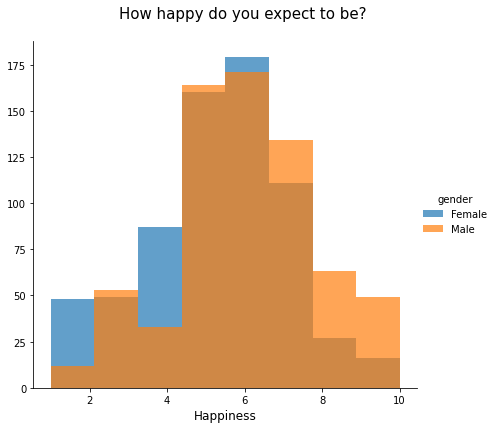

In [32]:
# How happy do you expect to be?
g = sns.FacetGrid(matches, hue='gender', height = 6)
g.map(plt.hist, 'exphappy', alpha= 0.7, bins=8)
g.set_xlabels('Happiness', fontsize=12) 
plt.subplots_adjust(top=0.9) #adjusts the view for more clarity
g.fig.suptitle('How happy do you expect to be?', fontsize=15)
g.add_legend() #adds legend for colors

In [33]:
# Male (1) seem to be more optimistic!

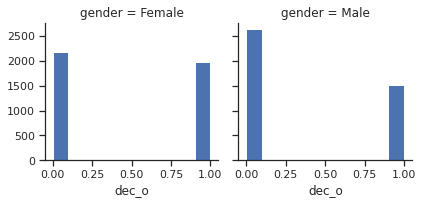

In [34]:
# But, in fact, it ooks like women received more positive answers to the question "would you like to the the other person again?"
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(df, col="gender")
g = g.map(plt.hist, "dec_o")
plt.ticklabel_format(useOffset=False, style='plain')

In [35]:
# After the experiment...

<AxesSubplot:ylabel='iid'>

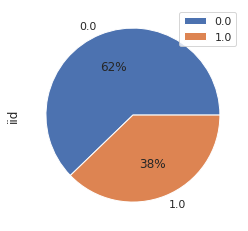

In [36]:
# 62% of the participants did not get any dates from the speed dating...
(df.groupby("date_3").count()).plot.pie(y="iid", autopct='%1.0f%%')

In [46]:
# If you have been on at least one date, please answer the following: 
# How many of your matches have you been on a date with so far?
px.histogram(df, x= 'numdat_3')

In [45]:
# And how many times?
px.pie(df['num_in_3'], names= df['num_in_3'])